# Artificial Neural Network

### Importing the libraries

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [251]:
tf.__version__ 

'2.12.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [252]:

names = ["sepal_length","sepal_width","petal_length","petal_width","class"]
df_flowers = pd.read_csv('iris.csv',sep=',',names =names) 
df_flowers 


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [253]:
X = df_flowers.iloc[:,:-1].values
y = df_flowers.iloc[:,-1].values

In [254]:
print(X)
print(X.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [255]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

### Encoding categorical data

One hot Encoding the independent variable

In [256]:
from sklearn.compose import ColumnTransformer   # the three countries France,Spain and Germany dont have any relation to each other hence it is one hot encoded
from sklearn.preprocessing import OneHotEncoder
y = y.reshape(-1, 1)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

In [257]:
print(y)
print(y.ndim)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

### Splitting the dataset into the Training set and Test set

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [259]:
print(X_train)
print(X_train.shape)

[[6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]
 [6.3 2.9 5.6 1.8]
 [6.6 2.9 4.6 1.3]
 [7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.  3.6 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.  3.4 4.5 1.6]
 [7.7 2.8 6.7 2. ]
 [5.7 3.  4.2 1.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.5 5.  2. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.  1.4 0.1]
 [4.7 3.2 1.3 0.2]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.5]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 2.9 4.3 1.3]
 [6.5 3.  5.5 1.8]
 [5.  2.3 3.3 1. ]
 [6.3 3.3 6.  2.5]
 [5.5 2.5 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.2 4.1 1.

In [260]:
print(y_train)
print(y_train.ndim)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1.

In [261]:
print(y_test)
print(y_test.ndim)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
2


### Feature Scaling

In [262]:
from sklearn.preprocessing import StandardScaler  # note: For feature scaling in DL all the attributes need to be scaled unlike ML
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [263]:
print(X_train)

[[ 0.31553662 -0.03612186  0.44748582  0.2345312 ]
 [ 2.2449325  -0.03612186  1.29803965  1.39642889]
 [-0.2873996  -1.240184    0.0505607  -0.15276803]
 [ 0.67729835 -0.51774672  1.01452171  1.13822941]
 [-0.04622511 -0.51774672  0.73100376  1.52552864]
 [-0.64916132  1.64956512 -1.31032543 -1.31466572]
 [-0.40798684 -1.72180885  0.10726429  0.10543146]
 [-0.76974857  0.92712784 -1.36702901 -1.31466572]
 [ 0.79788559 -0.51774672  0.44748582  0.36363094]
 [ 1.03906007 -1.240184    1.12792888  0.75093018]
 [ 1.15964732 -0.03612186  0.95781812  1.13822941]
 [-0.89033581  1.16794027 -1.36702901 -1.18556598]
 [ 0.19494938 -1.96262128  0.67430017  0.36363094]
 [ 0.5567111  -0.27693429  1.01452171  0.75093018]
 [ 0.91847283 -0.27693429  0.44748582  0.10543146]
 [ 2.2449325  -0.99937157  1.75166836  1.39642889]
 [-0.16681235  1.89037755 -1.19691825 -1.18556598]
 [-1.01092305  1.4087527  -1.36702901 -1.31466572]
 [-1.25209754 -0.03612186 -1.36702901 -1.18556598]
 [-0.76974857 -0.75855914  0.05

In [264]:
print(X_test)

[[-0.04622511  2.3720024  -1.48043619 -1.31466572]
 [-0.89033581 -1.240184   -0.4597716  -0.15276803]
 [ 0.91847283 -0.03612186  0.33407864  0.2345312 ]
 [-0.52857408  2.13118998 -1.4237326  -1.05646624]
 [ 2.48610699  1.89037755  1.46815041  1.00912966]
 [ 0.5567111   0.68631542  0.50418941  0.49273069]
 [ 1.28023456  0.20469056  0.73100376  1.39642889]
 [-0.89033581  1.89037755 -1.08351107 -1.05646624]
 [-1.37268478  0.44550299 -1.25362184 -1.31466572]
 [ 1.28023456  0.44550299  1.07122529  1.39642889]
 [-0.2873996  -0.75855914  0.22067147  0.10543146]
 [-0.52857408  2.13118998 -1.19691825 -1.05646624]
 [ 1.52140905 -0.03612186  1.18463247  1.13822941]
 [ 0.67729835  0.44550299  0.39078223  0.36363094]
 [ 0.19494938 -0.27693429  0.39078223  0.36363094]
 [-1.73444651  0.44550299 -1.4237326  -1.31466572]
 [-0.04622511 -0.99937157  0.10726429 -0.02366829]
 [-0.2873996  -0.03612186  0.39078223  0.36363094]
 [-0.52857408  0.92712784 -1.31032543 -1.05646624]
 [-1.01092305  0.44550299 -1.48

## Part 2 - Building the ANN

### Initializing the ANN

In [265]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [266]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the second hidden layer

In [267]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the output layer

In [268]:
ann.add(tf.keras.layers.Dense(units=3,activation='softmax'))

## Part 3 - Training the ANN

### Compiling the ANN

In [269]:
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Training the ANN on the Training set 

In [270]:
ann.fit(X_train, y_train,batch_size = 32,epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 911us/step - loss: 1.1164 - accuracy: 0.2667
Epoch 2/100
4/4 [==============================] - 0s 679us/step - loss: 1.0908 - accuracy: 0.2583
Epoch 3/100
4/4 [==============================] - 0s 589us/step - loss: 1.0635 - accuracy: 0.2583
Epoch 4/100
4/4 [==============================] - 0s 586us/step - loss: 1.0388 - accuracy: 0.2917
Epoch 5/100
4/4 [==============================] - 0s 624us/step - loss: 1.0174 - accuracy: 0.3583
Epoch 6/100
4/4 [==============================] - 0s 593us/step - loss: 0.9957 - accuracy: 0.4167
Epoch 7/100
4/4 [==============================] - 0s 660us/step - loss: 0.9739 - accuracy: 0.4417
Epoch 8/100
4/4 [==============================] - 0s 603us/step - loss: 0.9555 - accuracy: 0.4500
Epoch 9/100
4/4 [==============================] - 0s 583us/step - loss: 0.9379 - accuracy: 0.4583
Epoch 10/100
4/4 [==============================] - 0s 702us/step - loss: 0.9208 - accuracy: 0.4583
Epoch 11/

In [271]:
y_pred = ann.predict(X_test)
print(y_pred)
for i in range(len(y_pred)):
    if y_pred[i][0] == max(y_pred[i]):
        print("iris setosa")
    elif(y_pred[i][1] == max(y_pred[i])):
        print("iris versicolor")
    else:
        print("iris virginica")
    

1/1 [==============================] - 0s 27ms/step
[[9.8470140e-01 1.5115026e-02 1.8358523e-04]
 [2.6621997e-01 6.8729907e-01 4.6480991e-02]
 [4.7579505e-02 3.2079867e-01 6.3162190e-01]
 [9.8387456e-01 1.5984990e-02 1.4037683e-04]
 [4.8818797e-02 3.2114136e-01 6.3003987e-01]
 [7.9999447e-02 3.2452396e-01 5.9547657e-01]
 [2.9773409e-02 3.1298271e-01 6.5724385e-01]
 [9.7983861e-01 1.9971713e-02 1.8965469e-04]
 [9.8589176e-01 1.4084466e-02 2.3719351e-05]
 [3.5200823e-02 3.1607261e-01 6.4872658e-01]
 [1.0180827e-01 5.3312504e-01 3.6506671e-01]
 [9.7885644e-01 2.0870438e-02 2.7306666e-04]
 [2.5826361e-02 3.1015792e-01 6.6401571e-01]
 [6.8282679e-02 3.2447451e-01 6.0724282e-01]
 [5.0021023e-02 3.2325691e-01 6.2672216e-01]
 [9.9189359e-01 8.1006503e-03 5.6810654e-06]
 [9.4924025e-02 5.4001814e-01 3.6505780e-01]
 [6.5684438e-02 3.4306568e-01 5.9124988e-01]
 [9.6342778e-01 3.6191821e-02 3.8034417e-04]
 [9.8105961e-01 1.8895717e-02 4.4663819e-05]
 [1.0245700e-01 5.7994080e-01 3.1760219e-01]
 [1

In [272]:
print(y_test)
for i in range(len(y_pred)):
    if y_pred[i][0] == max(y_pred[i]):
        print("iris setosa")
    elif(y_pred[i][1] == max(y_pred[i])):
        print("iris versicolor")
    else:
        print("iris virginica")

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
iris setosa
iris versicolor
iris virginica
iris setosa
iris virginica
iris virginica
iris virginica
iris setosa
iris setosa
iris virginica
iris versicolor
iris setosa
iris virginica
iris virginica
iris virginica
iris setosa
iris versicolor
iris virginica
iris setosa
iris setosa
iris versicolor
iris virginica
iris virginica
iris setosa
iris virginica
iris versicolor
iris setosa
iris setosa
iris virginica
iris virginica


In [273]:
print(y_test.ndim )

2


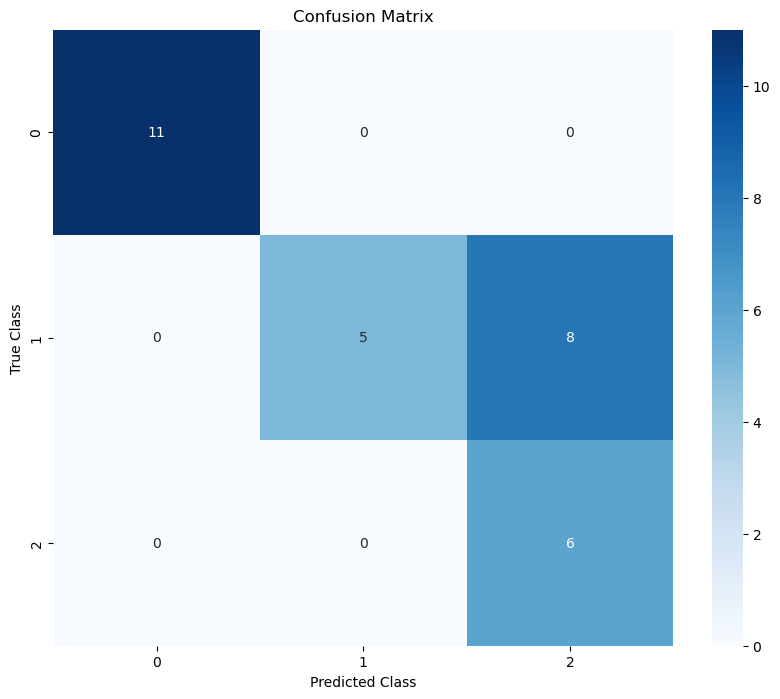

In [274]:

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


In [275]:
arr = [[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]]
print(arr[1][0])

4
